<B>The 6.4 Magnitude Guanica Earthquake on January 7,2020 in Puerto Rico</B> 

The Puerto Rico earthquake activity started on December 28, 2019, and it's still visible in 2020. The southwestern part of Puerto Rico was struck by an earthquake swarm during the months of December and January, 11 of them were magnitude 5 or greater. After this activity, lots of people lost their homes, one person died and several others were injured due to the mainshock.

<img src=https://upload.wikimedia.org/wikipedia/commons/0/0d/Puerto_Rico_2019_2020.png>

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

<B>SEARCH PARAMETERS</B>

In [11]:
startt = UTCDateTime("2019-12-28")
endt = UTCDateTime("2020-01-08")
lat = 17.916
lon = -66.813
minmag = 2.0
maxrad = 1.0

<B>CATALOG REQUEST</B>

In [12]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="NEIC PDE")

In [13]:
print(cat)

685 Event(s) in Catalog:
2020-01-07T23:59:43.040000Z | +17.979,  -66.750 | 2.73 Md
2020-01-07T23:47:57.950000Z | +17.973,  -66.769 | 2.42 Md
...
2019-12-28T02:13:47.300000Z | +17.896,  -66.573 | 2.13 Md
2019-12-28T00:10:18.140000Z | +18.869,  -66.805 | 2.14 Md
To see all events call 'print(CatalogObject.__str__(print_all=True))'


<B>Times and Mags</B>


The next code cell will create two list objects called times and mags to show the earthquake activity in the area of the event.

In [14]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
mtimes = mdates.date2num(times)
print(times[6],mags[6])
print(mtimes)

2020-01-07 23:25:12.180000 2.6
[ 737431.9998037   737431.99164294  737431.98752419  737431.98501898
  737431.98326523  737431.97994762  737431.97583542  737431.97294124
  737431.9722375   737431.96548449  737431.96222773  737431.96161042
  737431.95442164  737431.95105486  737431.94272884  737431.93155047
  737431.92782986  737431.92654618  737431.91083035  737431.90815521
  737431.90496898  737431.89977245  737431.89651053  737431.89369723
  737431.87626076  737431.86555332  737431.86079907  737431.85624236
  737431.85504645  737431.85372245  737431.85103045  737431.84994065
  737431.84655356  737431.84586219  737431.84169144  737431.83828854
  737431.83669106  737431.8325978   737431.83012068  737431.82667361
  737431.81607062  737431.8145728   737431.80642315  737431.80373692
  737431.79791887  737431.78039919  737431.77944351  737431.7751265
  737431.76423299  737431.76321056  737431.76112581  737431.75758808
  737431.75563022  737431.75217419  737431.74973947  737431.74469216
  73

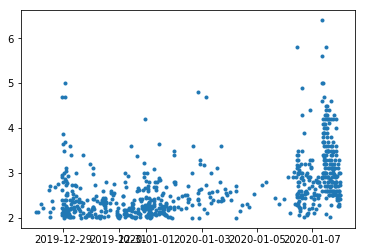

In [15]:
fig1 = plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.')
plt.show()

The magnitudes and activity of the earthquakes intensified in January. There is more activity in the first week of January than the rest of earlier dates.

<B>Next set of code</B>

This code will plot a bars graph, defining the figure and axes.

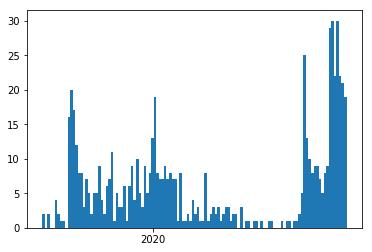

In [16]:
fig2, axes = plt.subplots(1,1)
axes.hist(mtimes, bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

The seismicity increased before 2020, then it decreased for a short period of time and increased in both activity and magnitude. The first activity was consistent, the last activity broke the parameters of consistency and got higher.

<B>EARTHQUAKE SPECTROGRAM</B>

A spectrogram is a visual way of representing the signal strenght, or "loudness", of a signal over time at various frequencies present in a particular waveform.

The spectrogram that will be used is the SJG Station from de "IU" Network localized in Cayey, because it looks very clear and detailed. 

In [6]:
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

In [23]:
network = "IU"
station = "SJG"
location = "00"
channel = "BHZ"
client = Client("IRIS")
startt = UTCDateTime("2020-01-07T08:18:25")
endt = UTCDateTime("2020-01-07T08:30:25")
st = client.get_waveforms(network, station, location, channel, startt, endt)

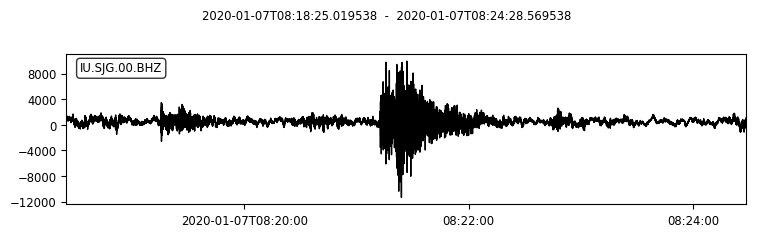

In [24]:
tr = st[0]
fig = tr.plot()

Seismic trace was extracted from the download stream and plotted.

In [25]:
plt.rcParams['figure.figsize'] = (12,4)

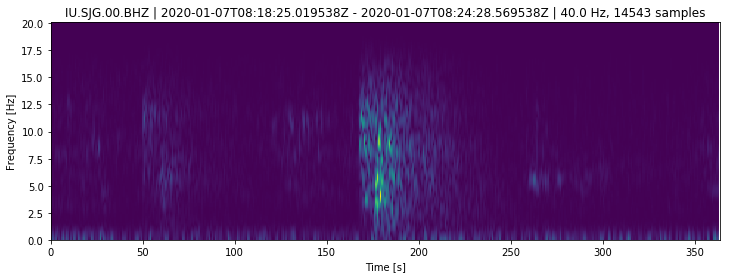

In [26]:
fig = tr.spectrogram(per_lap=.5, wlen=2)

The spectrogram shows the most energy when reaching the 200 seconds, and then it starts to fade. The beggining of the spectrograms seems to have some energy that looks latent, it comes and goes in between seconds until it intensifies and then fades almost completely. By that, it can be assumed that the P wave is he latent energy and the S wave is the more defined wave of energy. 